In [29]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_blobs(n_samples=150,
                           n_features=2,
                           centers=2,
                           cluster_std=1.05,
                           random_state=3)
print(X, y,  sep='\n\n')




[[ 2.57641382  4.41150853]
 [-3.0910055   0.87988349]
 [ 0.85372586  6.02106512]
 [-2.37645484 -2.26062337]
 [-4.66474368  2.30682681]
 [-3.23215031 -1.74238163]
 [ 1.93395806  2.80474299]
 [ 1.6912795   4.42449749]
 [ 1.06849338  3.73804517]
 [ 0.04597643  3.0878869 ]
 [ 0.4588468   3.39590348]
 [ 0.70074167  6.42901326]
 [ 2.04744386  3.00683544]
 [-3.53449844 -0.66296092]
 [ 1.66073899  3.28314857]
 [ 0.38947593  3.54493235]
 [ 0.33512662  3.38861837]
 [-2.04556659  3.14252392]
 [-4.78182163  0.4956285 ]
 [-4.17933885  0.66241961]
 [-0.26598896  4.22555266]
 [-4.86410851  1.92950421]
 [-3.71383522 -0.60529239]
 [-0.2283408   3.94702406]
 [-4.32955625  1.26349489]
 [-4.79983192 -1.40733151]
 [-7.00126933  0.23589394]
 [ 2.31110265  4.31939217]
 [-3.03251949  0.88822908]
 [ 0.06413862  4.25579242]
 [-4.2819047  -0.33699506]
 [-6.31381845 -0.79226176]
 [-0.36359994  5.09180995]
 [-5.26310022 -0.86516694]
 [-4.31605538  0.47712853]
 [ 1.67246527  3.99441742]
 [-3.0380252   0.24167023]
 

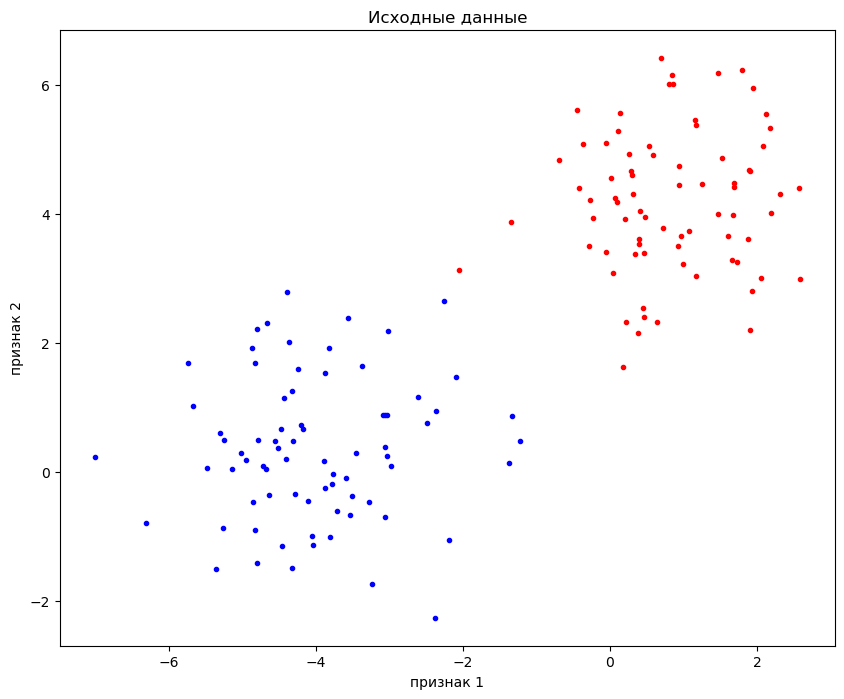

In [30]:
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r.')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'b.')
plt.xlabel("признак 1")
plt.ylabel("признак 2")
plt.title('Исходные данные')
plt.show()

In [31]:
def step_func(z):
    return 1.0 if (z > 0) else 0.0

def perceptron(X, y, lr, epochs):
    m, n = X.shape
    w = np.zeros((n+1, 1))    
    n_miss_list = []
    
    for epoch in range(epochs):
        n_miss = 0
        
        for idx, x_i in enumerate(X):
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            y_hat = step_func(np.dot(x_i.T, w))     
            
            if (np.squeeze(y_hat) - y[idx]) != 0:
                w += lr*((y[idx] - y_hat)*x_i)
                n_miss += 1
        #print(n_miss)
        n_miss_list.append(n_miss)
        
    return w, n_miss_list


In [32]:
def plot_decision_boundary(X, y, w):

    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[1]/w[2]
    c = -w[0]/w[2]
    x2 = m*x1 + c
    
    #print(x1, x2, c)
    
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r.")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "b.")
    plt.xlabel("Признак 1")
    plt.ylabel("Признак 2")
    plt.title('Перцептрон')
    plt.plot(x1, x2, 'g-')
    plt.show()

коррекция ошибки:  [3, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


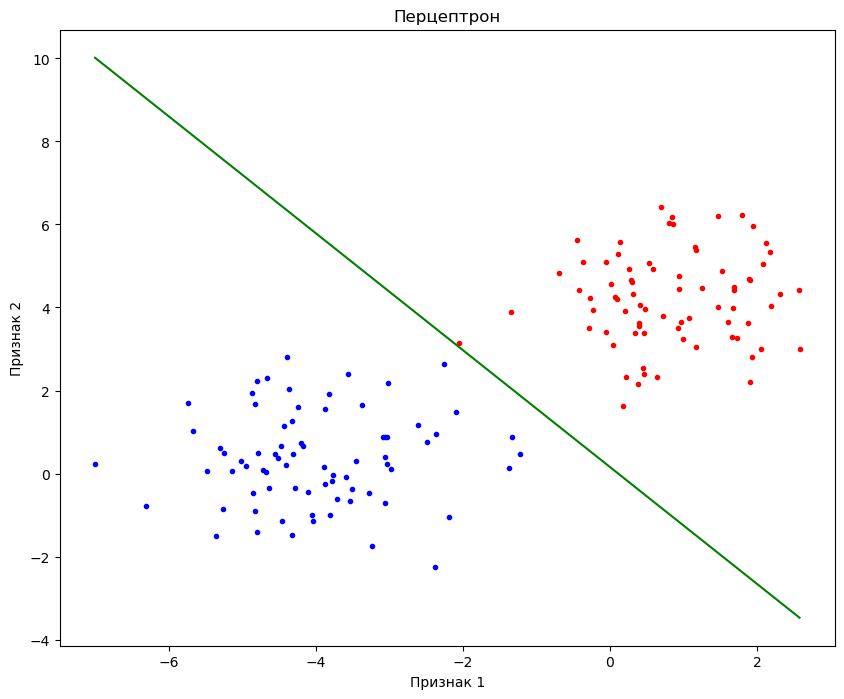

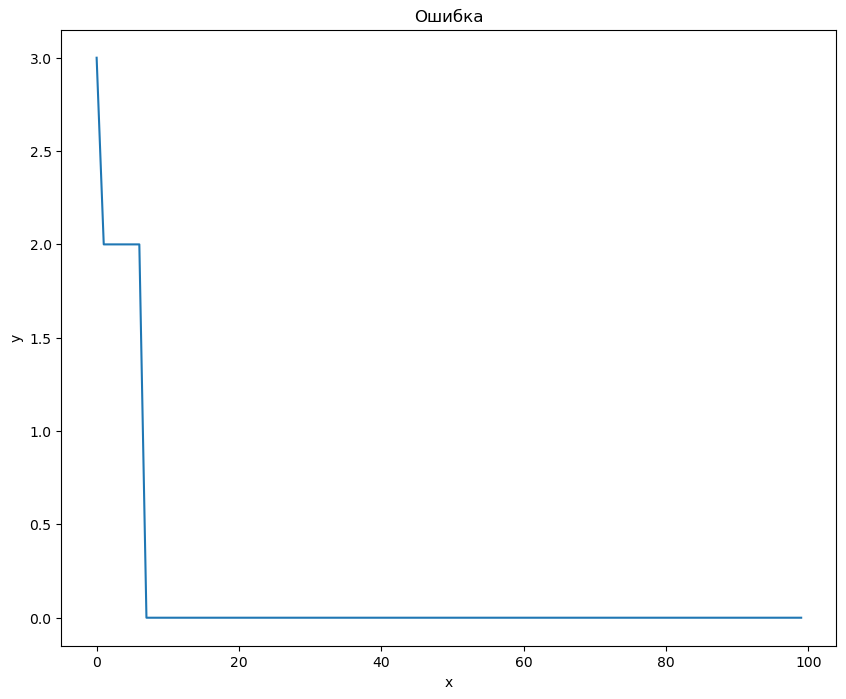

In [33]:
w, miss_l = perceptron(X, y, 0.5, 100)
print('коррекция ошибки: ', miss_l)
plot_decision_boundary(X, y, w)  

w1 = w

fig = plt.figure(figsize=(10,8))
plt.plot(miss_l)

plt.xlabel("x")
plt.ylabel("y")
plt.title('Ошибка')
plt.show()
# хорошо разделённые начальные данные перцептрон быстро ищет решение

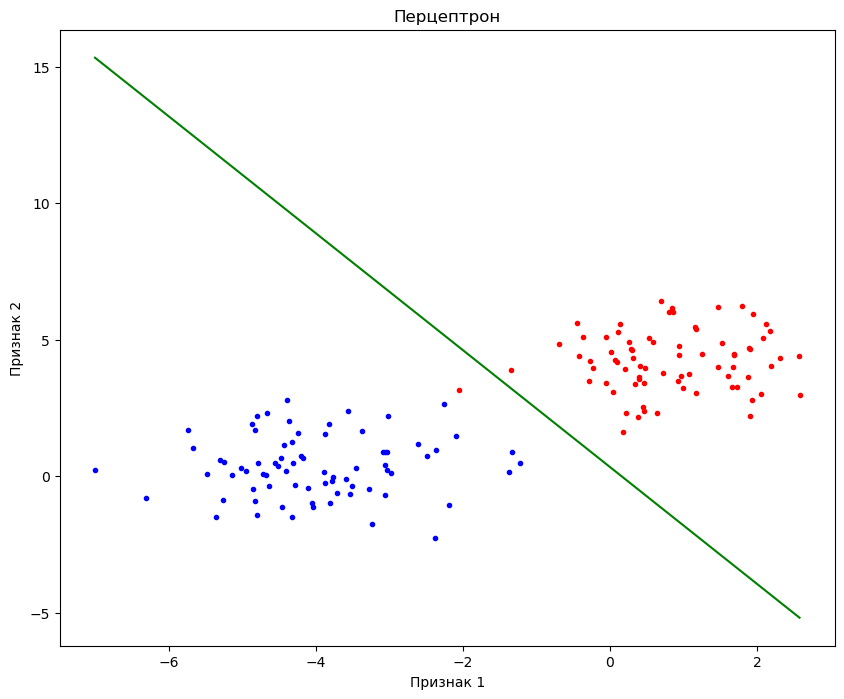

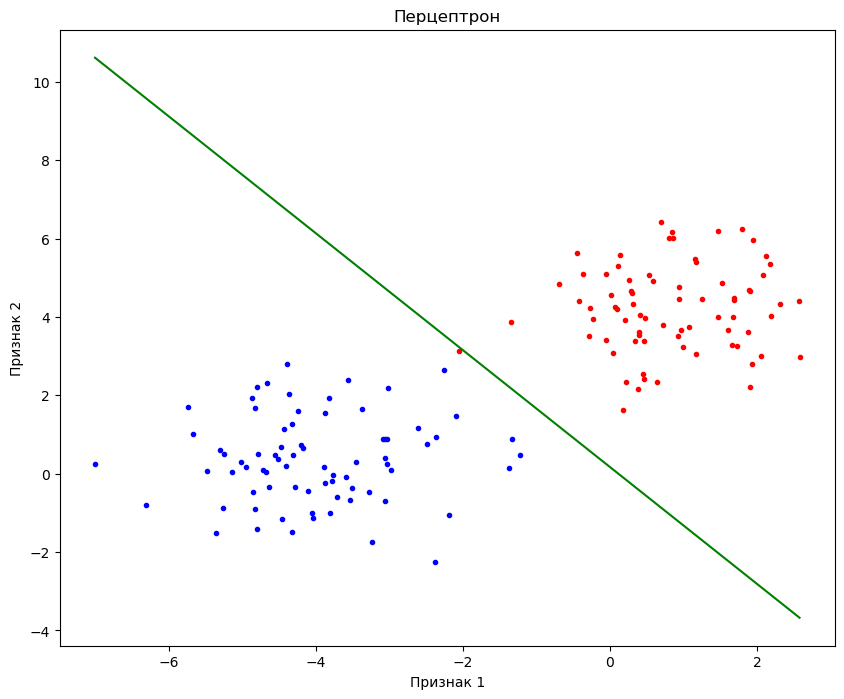

In [34]:


w, miss_l = perceptron(X, y, 0.5, 2)
plot_decision_boundary(X, y, w) 
w2 = w

w, miss_l = perceptron(X, y, 0.5, 6)
plot_decision_boundary(X, y, w) 
w3 = w


# изменем количество эпох, после двух эпох решение не найдено граница далеко от решения
# после шести эпох граница приближается к решению

изменение весов

[[ 0.5       ]
 [-4.48544274]
 [-3.18525867]]

[[ 0.5       ]
 [-3.20037812]
 [-1.49364915]]

[[ 0.5       ]
 [-4.38282816]
 [-2.93809852]]

[[ 0.5       ]
 [-4.48544274]
 [-3.18525867]]


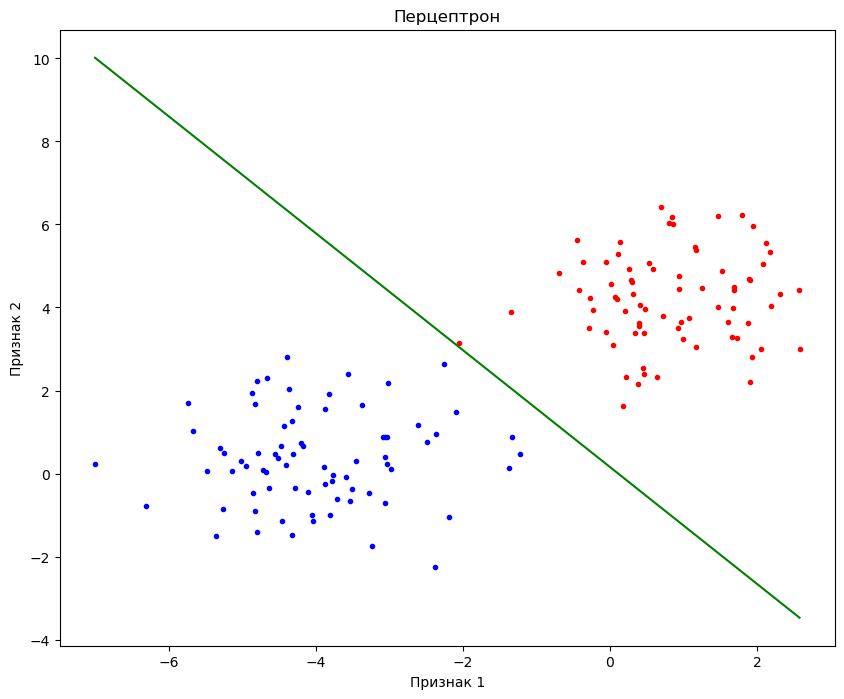

In [35]:
w, miss_l = perceptron(X, y, 0.5, 7)

print("изменение весов", w1, w2, w3 , w, sep='\n\n')

plot_decision_boundary(X, y, w) 

# на седьмом шаге достигли решения, на текущих входных данных достаточно семи эпох

In [36]:
X1, y1 = datasets.make_blobs(n_samples=150,
                           n_features=2,
                           centers=2,
                           cluster_std=0.8,
                           random_state=4)

print(X1, y1,  sep='\n\n')

# Введём более смешанные точки (близкие центры)

[[ 9.97965853e+00  4.26914765e+00]
 [ 9.49933293e+00  3.95250647e+00]
 [ 1.01352293e+01  3.46963974e+00]
 [ 9.46737241e+00  2.53671140e+00]
 [ 8.66095662e+00  5.82852113e+00]
 [ 8.85830344e+00  4.02331508e+00]
 [ 8.61624627e+00  1.28886205e+00]
 [ 8.92324719e+00  4.21924368e+00]
 [ 8.71760484e+00  1.08817356e+00]
 [ 1.06036962e+01  7.78899642e-01]
 [ 9.74219759e+00  3.08439643e+00]
 [ 1.04616183e+01  2.18939532e+00]
 [ 9.13415578e+00  3.12497302e+00]
 [ 1.10108935e+01  1.67651775e+00]
 [ 1.02486342e+01  3.43021893e+00]
 [ 8.45671753e+00  5.49196547e+00]
 [ 8.55420346e+00  9.88191175e-01]
 [ 8.51052238e+00  5.22116472e+00]
 [ 9.49782926e+00  3.14410797e+00]
 [ 1.12023657e+01  4.36354659e+00]
 [ 1.11462759e+01  4.10331293e+00]
 [ 9.83553253e+00  8.74255441e-01]
 [ 7.43677656e+00  4.58498030e-01]
 [ 1.02432954e+01  1.08931163e+00]
 [ 9.83238928e+00  8.43390108e-01]
 [ 9.28339448e+00  3.95830594e+00]
 [ 9.27661319e+00  1.46447725e+00]
 [ 9.74841986e+00  1.18500142e+00]
 [ 9.97678394e+00  9

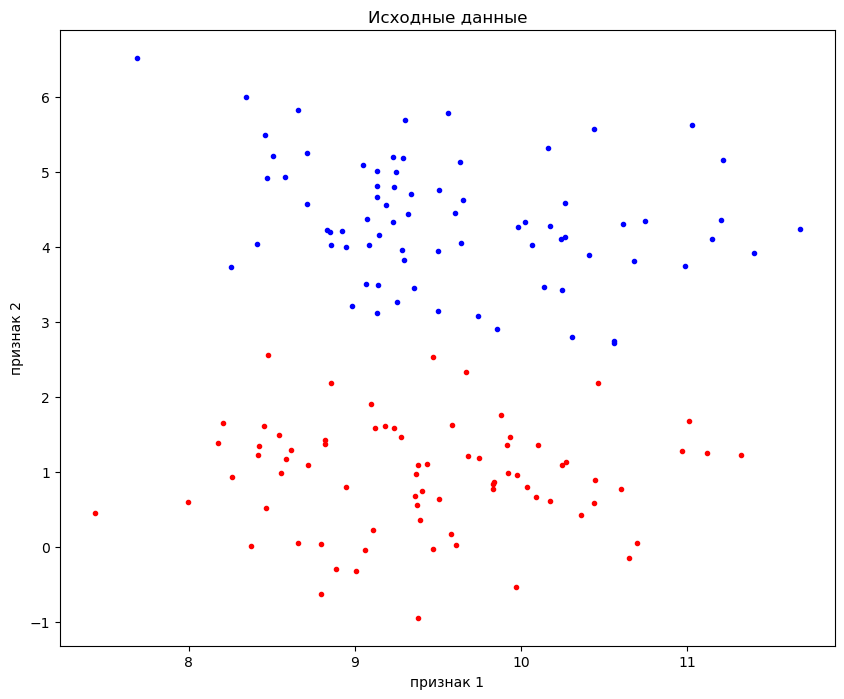

In [42]:
fig = plt.figure(figsize=(10,8))
plt.plot(X1[:, 0][y1 == 0], X1[:, 1][y1 == 0], 'r.')
plt.plot(X1[:, 0][y1 == 1], X1[:, 1][y1 == 1], 'b.')
plt.xlabel("признак 1")
plt.ylabel("признак 2")
plt.title('Исходные данные')
plt.show()

[[-52.        ]
 [-19.02988434]
 [ 80.82943504]]

[[-52.        ]
 [-18.02289714]
 [ 81.23755795]]


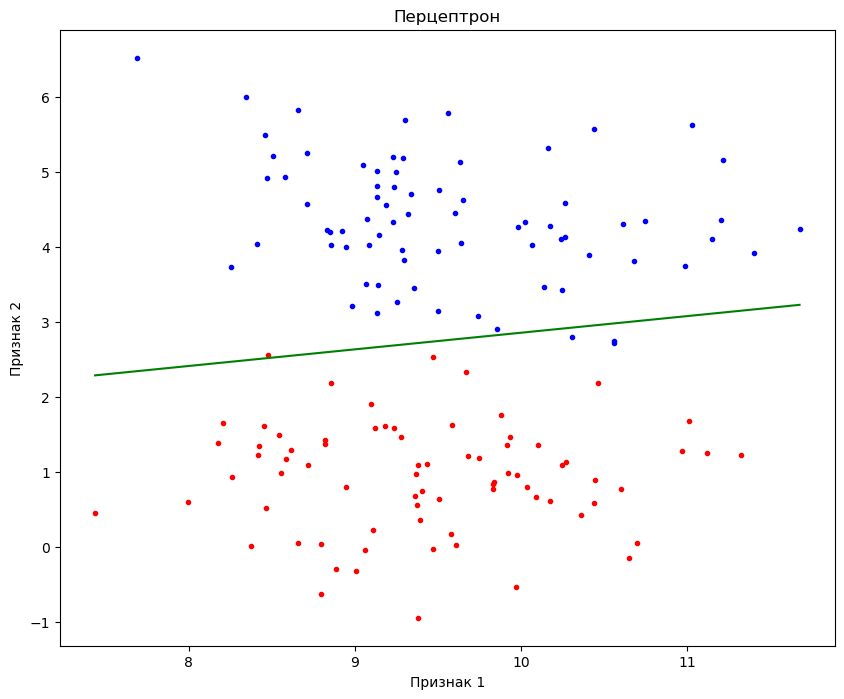

In [48]:
w, miss_l = perceptron(X1, y1, 0.5, 499)
print(w)
print()
w, miss_l = perceptron(X1, y1, 0.5, 500)
print(w)
plot_decision_boundary(X1, y1, w)



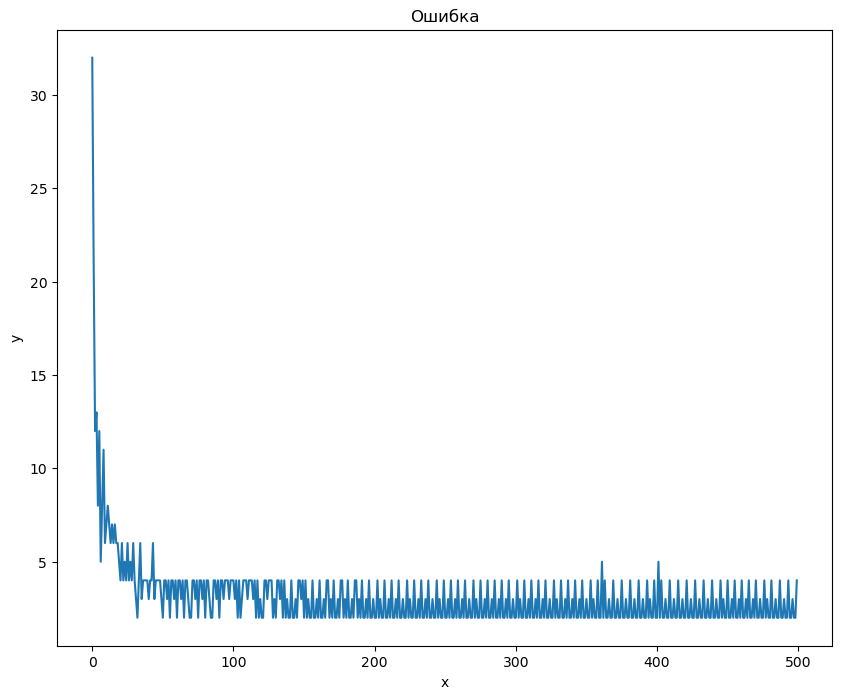

In [50]:
fig = plt.figure(figsize=(10,8))
plt.plot(miss_l)
plt.xlabel("x")
plt.ylabel("y")
plt.title('Ошибка')
plt.show()
# есть ошибки на 500 итераций

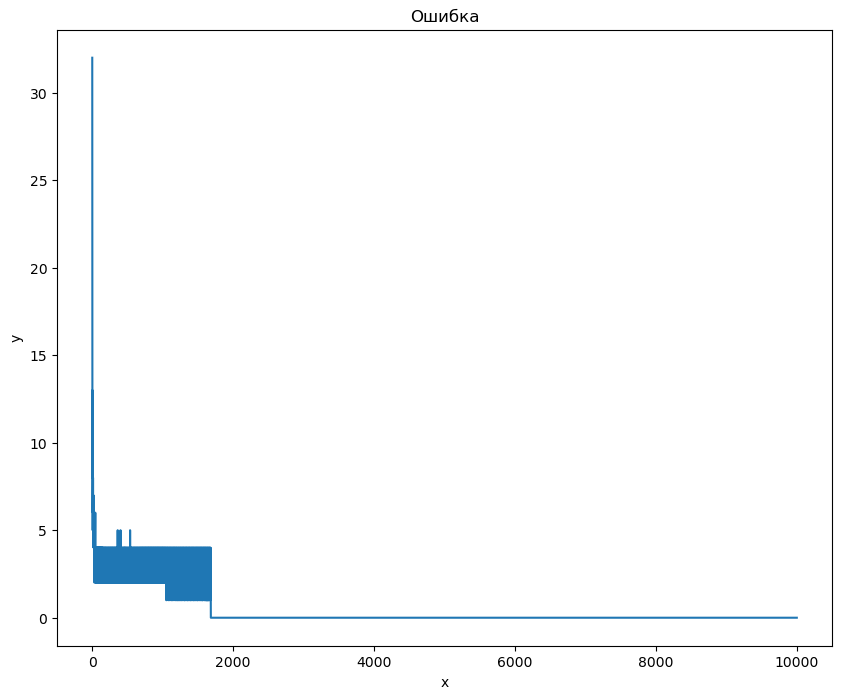

In [52]:
w, miss_l = perceptron(X1, y1, 0.5, 10000)

fig = plt.figure(figsize=(10,8))
plt.plot(miss_l)
plt.xlabel("x")
plt.ylabel("y")
plt.title('Ошибка')
plt.show()
# на 10 000 итераций, ошибка исчезает где то после 1 600 итераций

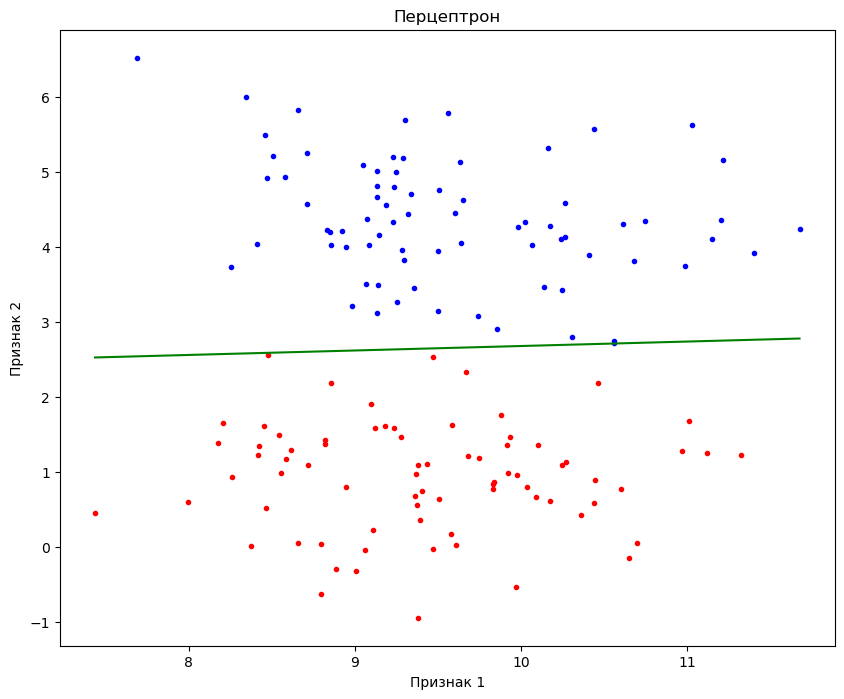

In [44]:

plot_decision_boundary(X1, y1, w)

[[-156.        ]
 [  -4.45896414]
 [  74.80772894]]
коррекция ошибки:  [32, 21, 12, 13, 8, 12, 5, 8, 11, 6, 7, 8, 7, 6, 7, 6, 7, 6, 6, 5, 4, 6, 4, 5, 4, 6, 4, 5, 4, 6, 4, 3, 2, 4, 6, 3, 4, 4, 4, 4, 3, 4, 4, 6, 3, 4, 4, 4, 4, 3, 2, 4, 4, 3, 4, 2, 4, 4, 3, 4, 2, 4, 4, 3, 4, 2, 4, 4, 3, 2, 2, 4, 4, 3, 4, 2, 4, 4, 3, 4, 2, 4, 4, 3, 2, 2, 4, 4, 3, 4, 2, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 2, 4, 2, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 2, 4, 2, 3, 2, 2, 4, 4, 3, 4, 4, 4, 2, 3, 2, 4, 4, 3, 4, 2, 4, 2, 3, 2, 2, 4, 2, 2, 3, 2, 4, 4, 3, 4, 2, 4, 2, 3, 2, 2, 4, 2, 2, 3, 2, 4, 2, 2, 3, 2, 4, 4, 2, 3, 2, 4, 2, 2, 3, 2, 4, 4, 2, 3, 2, 4, 2, 2, 3, 2, 4, 4, 2, 3, 2, 4, 2, 2, 3, 2, 4, 2, 2, 3, 2, 2, 4, 2, 3, 2, 2, 4, 2, 2, 3, 2, 4, 2, 2, 3, 2, 4, 2, 2, 3, 2, 2, 4, 2, 3, 2, 2, 4, 2, 2, 3, 2, 4, 2, 2, 3, 2, 4, 2, 2, 3, 2, 2, 4, 2, 3, 2, 2, 4, 2, 2, 3, 2, 4, 2, 2, 3, 2, 4, 2, 2, 3, 2, 4, 2, 2, 3, 2, 2, 4, 2, 3, 2, 2, 4, 2, 2, 3, 2, 4, 2, 2, 3, 2, 4, 2, 2, 3, 2, 4, 2, 2, 3, 2, 4, 2, 2, 3, 2, 2, 4, 2, 3, 2, 2, 4, 2

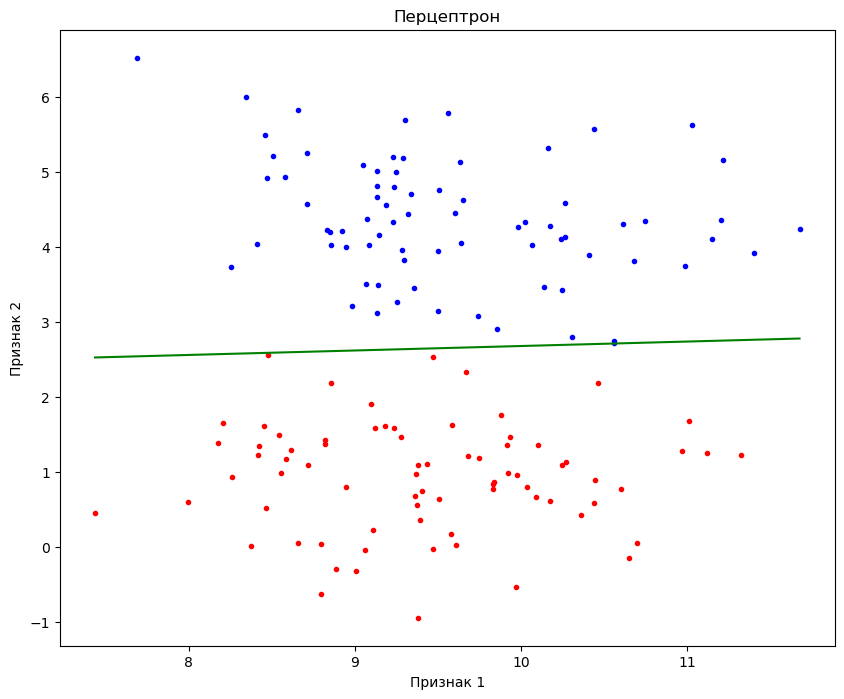

In [53]:
w, miss_l = perceptron(X1, y1, 0.5, 1684)
print(w)

print('коррекция ошибки: ', miss_l)
plot_decision_boundary(X1, y1, w)


# ошибка исчезает на 1684 шаге

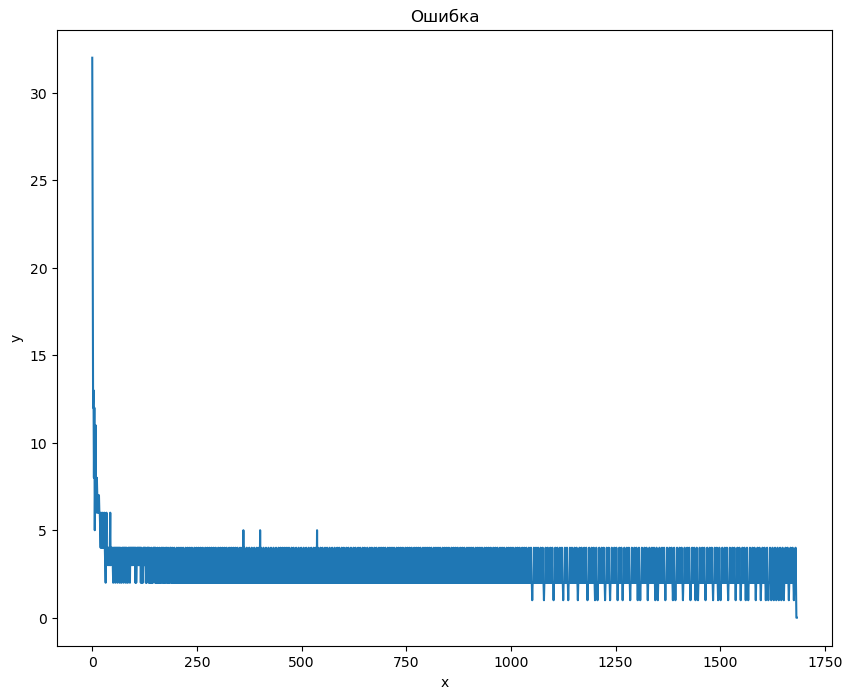

In [54]:
fig = plt.figure(figsize=(10,8))
plt.plot(miss_l)

plt.xlabel("x")
plt.ylabel("y")
plt.title('Ошибка')
plt.show()